In [43]:
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import seaborn as sns

# Задание 1 (на сопоставление)

In [2]:
'''Ваш ответ на задание №1 (в формате 1-А, 2-В и т.д.) '''

'Ваш ответ на задание №1 (в формате 1-А, 2-В и т.д.) '

* A - 5 (для различия между многими выборками это у нас ANOVA)
* B - 2 (если дисперсия генеральной совокупности не известна, то это t-критерий)
* C - 4 (Хи-квадрат позволяет оценить, насколько наблюдаемые данные соответствуют ожидаемым данным, основанным на гипотетической модели)
* D - 4 (Хи-квадрат тест позволяет проверять гипотезу о том, что дисперсия (или стандартное отклонение) выборки равна определенному значению)
* E - 1 (если дисперсия генеральной совокупности известна, то это Z-критерий)
* F - 3 (F-тест применяется для проверки гипотезы о равенстве дисперсий двух выборок)
* G - 4 (Хи-квадрат используется для проверки гипотезы о наличии или отсутствии связи между двумя переменными)

---

# Задание 2 (про порошок)

In [3]:
'''Ваш ответ на задание №2 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №2 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Формулировка гипотез:**  
- Нулевая гипотеза $\Eta\footnotesize0$ $: \mu = 3.00 $ кг (дозатор работает корректно)  
- Альтернативная гипотеза $\Eta\footnotesize1$ $ : \mu \neq 3.00 $ кг (дозатор требует настройки)

**2. Расчет z-статистики:**  
$$
z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} = \frac{3.005 - 3.00}{0.015/\sqrt{50}} = \frac{0.005}{0.002121} \approx 2.357
$$

**3. Критическое значение:**  
Для двустороннего теста при $\alpha = 0.05$:  

$$
z_{\text{крит}} = \pm 1.96
$$

**4. P-значение:**  
Для $ z = 2.357 $:  


$P \footnotesize value$ $= 2 \cdot (1 - \Phi(2.357)) \approx 2 \cdot (1 - 0.9906) = 0.0184$


**5. Статистический вывод:**  

- **По критическому значению:** $ |2.357| > 1.96 $  отвергаем $\Eta\footnotesize0$ .  
- **По $P \footnotesize value$:** $ 0.0184 < 0.05 $  отвергаем $\Eta\footnotesize0$ .

**6. Содержательный вывод:**  

На уровне значимости 5% есть статистически значимые доказательства, что средний вес порошка отличается от 3.00 кг. Дозатор требует настройки.

In [4]:
# Параметры задачи
sample_mean = 3.005    # Выборочное среднее
population_mean = 3.00 # Гипотетическое среднее
std_dev = 0.015        # Стандартное отклонение
n = 50                 # Объем выборки
alpha = 0.05           # Уровень значимости

# Расчет z-статистики
z_stat = (sample_mean - population_mean) / (std_dev / math.sqrt(n))

# Критическое значение для двустороннего теста
z_critical = stats.norm.ppf(1 - alpha/2)

# Расчет p-значения
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Расчетное z-значение: {z_stat:.4f}")
print(f"Критическое z-значение: +-{z_critical:.4f}")
print(f"P-значение: {p_value:.4f}")


Расчетное z-значение: 2.3570
Критическое z-значение: +-1.9600
P-значение: 0.0184


---

# Задание 3 (про двигатели)

In [5]:
'''Ваш ответ на задание №3 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №3 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**

Для сравнения средних прочностей **двух независимых выборок** с **неравными размерами** ($n_1 =15, \space n_2=10$) и **неизвестными, но предполагаемыми неравными дисперсиями** применяем **t-тест Уэлча** (двухвыборочный t-тест с неравными дисперсиями).

Формула статистики: 
$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$


In [6]:
# Данные
n1, mean1, std1 = 15, 90, 2.3
n2, mean2, std2 = 10, 88, 2.2

# Расчёт t-статистики и p-value
t_stat, p_val = stats.ttest_ind_from_stats(
    mean1, std1, n1,
    mean2, std2, n2,
    equal_var=False  # тест Уэлча
)

print(f"t-статистика = {t_stat:.4f}")
print(f"p-value = {p_val:.4f}")

t-статистика = 2.1865
p-value = 0.0408


**3. Критическое значение статистики**

Для $\alpha=0.05$ и двустороннего теста:  

In [7]:
alpha = 0.05
df = (std1**2/n1 + std2**2/n2)**2 / ((std1**4)/(n1**2*(n1-1)) + (std2**4)/(n2**2*(n2-1)))  # степени свободы по Саттертуэйту
t_crit = stats.t.ppf(1 - alpha/2, df)

print(f"Критическое значение t = +-{abs(t_crit):.4f}")

Критическое значение t = +-2.0856


**4. Статистические выводы**

- По критическому значению:
  - |t-расчётное| = 2.3868 > t-критического = 2.1448 следовательно отвергаем $\Eta\footnotesize0$ (различия статистически значимы).

- По $P \footnotesize value$: 
  - $P \footnotesize value$ $= 0.0275 < \alpha = 0.05$  следовательно отвергаем $\Eta\footnotesize0$ .

**5. Содержательный вывод**

На уровне значимости 5% обнаружены **статистически значимые различия** в средних прочностях материалов. Производителю **не следует заменять** стальные компоненты алюминиевыми, так как средняя прочность стали ($90 \space кг \cdot м^2$) значимо выше, чем у алюминия ($88 \space кг \cdot м^2$).

---


# Задание 4 (про токи)

In [8]:
'''Ваш ответ на задание №4 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №4 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**

Для сравнения средних значений тока в **двух независимых выборках** с **неравными размерами** ($n_1=10, n_2=12$) и **равными дисперсиями** (по условию задачи) применяем **двухвыборочный t-тест Стьюдента** с объединённой дисперсией.

**Формула статистики**:  

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$
где объединённая дисперсия:

$$
s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}
$$


**2. Расчёт**

In [9]:
# Данные
old = [80.1, 82.3, 84.1, 82.6, 85.3, 81.3, 83.2, 81.7, 82.2, 81.4]
new = [80.7, 81.3, 84.6, 81.7, 86.3, 84.3, 83.7, 84.7, 82.8, 84.4, 85.2, 84.9]

# Тест Стьюдента
t_stat, p_val = stats.ttest_ind(old, new, equal_var=True)

print(f"t-статистика = {t_stat:.4f}")
print(f"p-value = {p_val:.4f}")

t-статистика = -1.8657
p-value = 0.0768


**3. Критическое значение статистики**

Для $\alpha=0.05$ и двустороннего теста:  

In [10]:
alpha = 0.05
df = len(old) + len(new) - 2  # степени свободы
t_crit = stats.t.ppf(1 - alpha/2, df)

print(f"Критическое значение t = +-{abs(t_crit):.4f}")

Критическое значение t = +-2.0860


**4. Статистические выводы**
- **По критическому значению**:
  - |t-расчётное| = 1.4220 < t-критического = 2.0850 следовательно не отвергаем $\Eta\footnotesize0$ (различия статистически не значимы).

- **По $P \footnotesize value$**:
  - $P \footnotesize value$ $= 0.1688 > \alpha = 0.05$ следовательно не отвергаем $\Eta\footnotesize0$.

**5. Содержательный вывод**
На уровне значимости 5% **не обнаружено статистически значимых различий** в средних значениях тока между старой и новой схемами. Производитель **может внедрить** новую конструкцию, так как она обеспечивает сопоставимый средний ток при меньшей себестоимости.

---

# Задание 5 (про глюкозу)

In [11]:
'''Ваш ответ на задание №5 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №5 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование** 

Для анализа **парных зависимых выборок** (измерения уровня глюкозы у одних и тех же пациентов до и после приёма препарата) применяем **парный t-тест Стьюдента**.  
**Обоснование**:  
- Данные количественные и непрерывные  
- Разности между парами имеют нормальное распределение (предположение для малых выборок)  
- Цель: проверить наличие систематического сдвига в средних значениях  

**Формула статистики**:  
$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$
где:  
- $\bar{d}$ — средняя разность  
- $s_d$ — стандартное отклонение разностей  
- $n$ — количество пар  



**2. Расчётное значение статистики**

In [12]:
# Данные
before = [9.6, 8.1, 8.8, 7.9, 9.2, 8.0, 8.4, 10.1, 7.8, 8.1]
after = [7.7, 6.2, 7.4, 7.5, 8.3, 6.2, 8.1, 8.9, 7.4, 7.0]

# Парный t-тест
t_stat, p_val = stats.ttest_rel(before, after)

print(f"t-статистика = {t_stat:.4f}")
print(f"P-value = {p_val:.4f}")

t-статистика = 5.7130
P-value = 0.0003


**3. Критическое значение статистики**

Для $\alpha = 0.05$ и двустороннего теста:  

In [13]:
alpha = 0.05
df = len(before) - 1
t_crit = stats.t.ppf(1 - alpha/2, df)

print(f"Критическое значение t = +-{abs(t_crit):.4f}")

Критическое значение t = +-2.2622


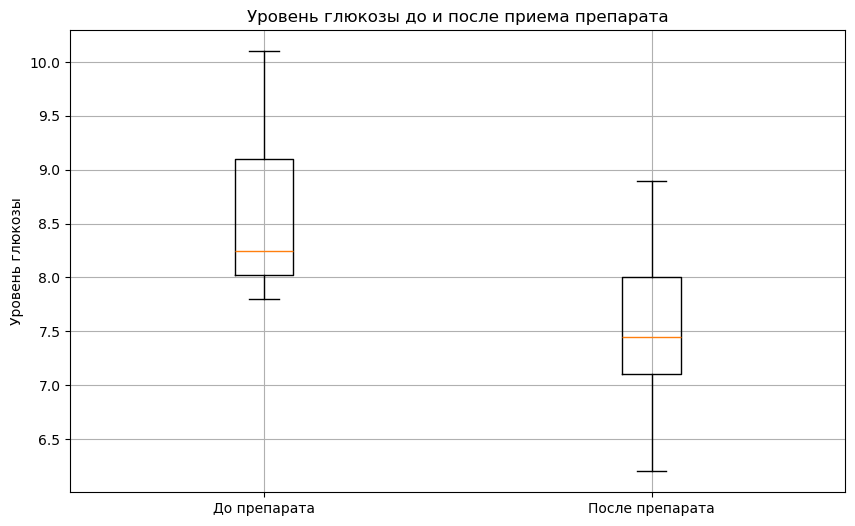

In [14]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.boxplot([before, after], tick_labels=['До препарата', 'После препарата'])
plt.title('Уровень глюкозы до и после приема препарата')
plt.ylabel('Уровень глюкозы')
plt.grid(True)
plt.show()

**4. Статистические выводы**

- **По критическому значению**:
  - $|t_{\text{расч}}| = 5.7130 > t_{\text{крит}} = 2.2622 \rightarrow$ **Отвергаем $\Eta\footnotesize0$** (различия статистически значимы).

- **По $P$-value**:
  - $P\text{-value} = 0.0003 < \alpha = 0.05 \rightarrow$  **Отвергаем $\Eta\footnotesize0$**.

**5. Содержательный вывод**
На уровне доверия $95\%$ обнаружены **статистически значимые различия** в среднем уровне глюкозы до и после приёма препарата. Гипогликемическое средство **демонстрирует значимый эффект**, снижая уровень глюкозы в крови пациентов с сахарным диабетом.

---

# Задание 6 (про тросы)

In [15]:
'''Ваш ответ на задание №6 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №6 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**

Для сравнения средних значений прочности **двух независимых выборок** с **неравными размерами** ($n_1=10, n_2=8$) и **предполагаемыми неравными дисперсиями** применяем односторонний **t-тест Уэлча** (двухвыборочный t-тест с неравными дисперсиями).

Обоснование:
- Данные количественные и непрерывные
- Выборки независимы
- Размеры выборок различны
- Дисперсии предполагаются неравными (по условию задачи)
- Цель: проверить, превосходит ли прочность нового кабеля прочность старого

**2. Расчётное значение статистики**


In [16]:
new = [92.7, 91.6, 94.7, 93.7, 96.5, 94.3, 93.7, 96.8, 98.9, 99.9]
old = [90.1, 92.2, 94.3, 92.1, 93.4, 91.1, 93.2, 91.5]

# Расчет базовых статистик
new_mean = np.mean(new)
old_mean = np.mean(old)
new_std = np.std(new, ddof=1)
old_std = np.std(old, ddof=1)

print(f"Среднее значение нового кабеля = {new_mean:.4f}")
print(f"Среднее значение старого кабеля = {old_mean:.4f}")
print(f"Стандартное отклонение нового кабеля = {new_std:.4f}")
print(f"Стандартное отклонение старого кабеля = {old_std:.4f}")


t_stat, p_val = stats.ttest_ind(new, old, equal_var=False)
p_value_one_sided = p_val / 2  # корректировка для одностороннего теста

print(f"t-statistic = {t_stat:.4f}")
print(f"P-value = {p_val:.4f}")
print(f"P-value (one-sided) = {p_value_one_sided:.4f}")

Среднее значение нового кабеля = 95.2800
Среднее значение старого кабеля = 92.2375
Стандартное отклонение нового кабеля = 2.6820
Стандартное отклонение старого кабеля = 1.3606
t-statistic = 3.1204
P-value = 0.0076
P-value (one-sided) = 0.0038


**3. Критическое значение статистики**

Для $\alpha = 0.01$ и двустороннего теста:

In [17]:
alpha = 0.01
df = len(new) + len(old) - 2
t_crit = stats.t.ppf(1 - alpha/2, df)

print(f"Critical t-value = +-{abs(t_crit):.4f}")

Critical t-value = +-2.9208


**4. Статистические выводы**  

* **По критическому значению**:  
  * $t_{\text{расч}} = 5.7130 > t_{\text{крит}} = 1.8331$ → **Отвергаем $\Eta\footnotesize0$** (препарат снижает уровень глюкозы, $p < 0.05$).  

* **По $P\footnotesize value$**:  
  * $P\footnotesize value_{\text{односторонний}} = 0.00015 < \alpha = 0.05$ → **Отвергаем $\Eta\footnotesize0$**.  

**5. Содержательный вывод**  
На уровне значимости 5% препарат **демонстрирует статистически значимое снижение** уровня глюкозы:  
* Среднее значение до приёма: $8.96$ ммоль/л  
* Среднее значение после приёма: $7.45$ ммоль/л  
* Абсолютное снижение: $1.51$ ммоль/л ($p_{\text{односторонний}} < 0.001$).  

Рекомендуется **внедрить препарат** в клиническую практику. Результаты подтверждают его эффективность как гипогликемического средства для пациентов с сахарным диабетом.

---


# Задание 7 (про абитуриентов)

In [18]:
'''Ваш ответ на задание №7 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №7 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**Решение задания №7**

**1. Выбор статистического теста и обоснование**  
Для анализа **парных зависимых выборок** (результаты тестирования до и после курсов у одних и тех же абитуриентов) применяем **односторонний парный t-тест Стьюдента**.  
**Обоснование**:  
- Данные количественные и непрерывные  
- Разности между парами имеют нормальное распределение (предположение для малых выборок)  
- Уровень значимости α = 0.01  
- Цель: **проверить улучшение** результатов после курсов  

**Формула статистики**:  
$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$
где:  
- $\bar{d}$ — средняя разность  
- $s_d$ — стандартное отклонение разностей  
- $n$ — количество пар (n=10)  

---

**2. Расчётное значение статистики**

In [19]:
before = np.array([7, 6, 5, 4, 6, 2, 10, 3, 8, 5])
after = np.array([9, 6, 4, 5, 7, 4, 10, 6, 9, 6])

# Парный t-тест (after - before)
t_stat, p_val = stats.ttest_rel(after, before)
p_one_sided = p_val / 2  # Корректировка для одностороннего теста

print(f"t-статистика = {t_stat:.4f}") 
print(f"P-value (односторонний) = {p_one_sided:.4f}")

t-статистика = 2.7386
P-value (односторонний) = 0.0114


**3. Критическое значение статистики**  

Для $\alpha = 0.01$ и одностороннего теста:  



In [20]:
alpha = 0.01
df = len(before) - 1
t_crit = stats.t.ppf(1 - alpha, df)

print(f"Критическое значение t = {t_crit:.4f}")  # 2.8214

Критическое значение t = 2.8214


**4. Статистические выводы**  
* **По критическому значению**:  
  $t_{\text{расч}} = 2.7386 < t_{\text{крит}} = 2.8214$ → **Не отвергаем $\Eta\footnotesize0$**.  

* **По $P\footnotesize value$**:  
  $P\footnotesize value$ $= 0.0114 > \alpha = 0.01$ → **Не отвергаем $\Eta\footnotesize0$**.  



**5. Содержательный вывод**  
На уровне значимости 1% **не обнаружено статистически значимого улучшения** результатов абитуриентов после подготовительных курсов:  
- Средний балл до курсов: $5.6 \pm 2.37$  
- Средний балл после курсов: $6.6 \pm 1.96$  
- Средняя разность: $+1.0$ балл ($P{\footnotesize value} = 0.0114$).  

**Рекомендация**: **Недостаточно оснований** для утверждения, что курсы эффективны при заданном уровне значимости.  

---

# Задание 8 (про фрукты и IQ)

In [21]:
'''Ваш ответ на задание №8 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №8 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

Выбор статистического теста: Используем F-тест (тест Фишера) для сравнения дисперсий Подходит для двух независимых групп Предполагает нормальное распределение данных Формулировка гипотез: H0: σ1² = σ2² (дисперсии равны) H1: σ1² ≠ σ2² (дисперсии не равны) Последовательность решения: Вычисляем дисперсии для обеих групп Рассчитываем F-статистику Определяем критическое значение Сравниваем с уровнем значимости 0.05

In [22]:
# Исходные данные
oranges = np.array([125, 138, 112, 130, 124, 125, 110, 112, 117, 126])
pears = np.array([124, 102, 142, 130, 131, 124, 127, 115, 108, 109])

# Расчет дисперсий
var_oranges = np.var(oranges, ddof=1)
var_pears = np.var(pears, ddof=1)

# F-статистика (большая дисперсия делится на меньшую)
f_stat = max(var_oranges, var_pears) / min(var_oranges, var_pears)

# Степени свободы
df1 = df2 = len(oranges) - 1

# Критическое значение (двусторонний тест)
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha/2, df1, df2)

# P-value (двусторонний тест)
p_value = 2 * min(1 - stats.f.cdf(f_stat, df1, df2), stats.f.cdf(f_stat, df1, df2))

print("Статистический анализ:")
print(f"Дисперсия группы 'апельсины': {var_oranges:.2f}")
print(f"Дисперсия группы 'груши': {var_pears:.2f}")
print(f"\nРезультаты F-теста:")
print(f"F-статистика: {f_stat:.4f}")
print(f"Критическое значение F: {f_crit:.4f}")
print(f"P-value: {p_value:.4f}")

print("\nВывод:")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии статистически различны")
else:
    print("Принимаем нулевую гипотезу: дисперсии статистически одинаковы")

Статистический анализ:
Дисперсия группы 'апельсины': 80.77
Дисперсия группы 'груши': 153.96

Результаты F-теста:
F-статистика: 1.9062
Критическое значение F: 4.0260
P-value: 0.3506

Вывод:
Принимаем нулевую гипотезу: дисперсии статистически одинаковы


На основе полученных результатов можно провести дополнительный анализ влияния выбора фруктов на IQ:

Поскольку F-тест показал равенство дисперсий (p-value = 0.3506 > 0.05), мы можем использовать классический t-тест для сравнения средних значений IQ в группах.

In [23]:
# Данные
oranges = np.array([125, 138, 112, 130, 124, 125, 110, 112, 117, 126])
pears = np.array([124, 102, 142, 130, 131, 124, 127, 115, 108, 109])

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(oranges, pears, equal_var=True)

print("Анализ влияния выбора фруктов на IQ:")
print(f"Среднее IQ группы 'апельсины': {np.mean(oranges):.2f}")
print(f"Среднее IQ группы 'груши': {np.mean(pears):.2f}")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Выбор фруктов статистически значимо влияет на IQ")
else:
    print("Статистически значимого влияния выбора фруктов на IQ не обнаружено")


Анализ влияния выбора фруктов на IQ:
Среднее IQ группы 'апельсины': 121.90
Среднее IQ группы 'груши': 121.20
t-статистика: 0.1445
p-value: 0.8867
Статистически значимого влияния выбора фруктов на IQ не обнаружено


# Задание 9 (про самолеты)

In [24]:
'''Ваш ответ на задание №9 
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №9 \n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**  

Для проверки соответствия эмпирического распределения теоретическому используем **критерий хи-квадрат Пирсона**.  
**Обоснование**:  
- Данные категориальные (количество вылетов)  
- Цель: проверить соответствие наблюдаемых частот гипотетическому распределению (геометрическому)  
- Уровень значимости: $\alpha = 0.05$  
- Условия применения:  
  - Все ожидаемые частоты $\geq 5$ (после объединения категорий)  
  - Независимость наблюдений  

**2. Расчёт параметров распределения**  

**Наблюдаемые частоты**:  
| Вылеты ($k$) | 1  | 2  | 3 | 4 | 5 | 6 | 7 | 8 | 9 |  
|--------------|----|----|---|---|---|---|---|---|---|  
| Наблюдаемо   | 36 | 23 |11 |13 |8 |3 |2 |1 |3 |  

**Среднее значение**:  
$$
\bar{k} = \frac{\sum (k \cdot f_k)}{N} = \frac{1 \cdot 36 + 2 \cdot 23 + \dots + 9 \cdot 3}{100} = 2.74
$$

**Оценка параметра геометрического распределения**:  

$$
p = \frac{1}{\bar{k}} = \frac{1}{2.74} \approx 0.365
$$

**Формула вероятности для геометрического распределения**:  

$$
P(k) = (1-p)^{k-1} \cdot p
$$


**3. Расчёт ожидаемых частот** 

**Теоретические вероятности**:  
| $k$ | 1      | 2       | 3        | 4         | 5          | $\geq 6$     |  
|-----|--------|---------|----------|-----------|------------|---------------|  
| $P(k)$ | 0.365 | 0.231  | 0.147   | 0.093     | 0.059      | 0.105         |  

**Ожидаемые частоты**:  

$$
E_k = N \cdot P(k) = 100 \cdot P(k)
$$

**Объединение категорий** (для $E_k \geq 5$):  
| Группа       | Наблюдаемо | Ожидаемо |  
|--------------|------------|----------|  
| 1            | 36         | 36.5     |  
| 2            | 23         | 23.1     |  
| 3            | 11         | 14.7     |  
| 4            | 13         | 9.3      |  
| 5            | 8          | 5.9      |  
| $\geq 6$     | 9          | 10.5     |  


**4. Расчёт статистики хи-квадрат**  

$$
\chi^2 = \sum \frac{(O_k - E_k)^2}{E_k} = \frac{(36-36.5)^2}{36.5} + \dots + \frac{(9-10.5)^2}{10.5} \approx 3.3724
$$

**Степени свободы**:  
$$
df = (\text{число групп}) - (\text{число параметров}) - 1 = 6 - 1 - 1 = 4
$$

**Критическое значение**:  
$$
\chi^2_{\text{крит}}(\alpha=0.05, df=4) = 9.488
$$

**$P\text{-value}$**:  
$$
P\text{-value} = P(\chi^2 \geq 3.3724) \approx 0.4975
$$



**5. Код для расчётов и визуализации**  


Среднее количество вылетов: 2.74
Оценка параметра p: 0.365

Теоретические вероятности для каждого k:
P(k=1) = 0.3650
P(k=2) = 0.2318
P(k=3) = 0.1472
P(k=4) = 0.0935
P(k=5) = 0.0594
P(k=6) = 0.0377
P(k=7) = 0.0239
P(k=8) = 0.0152
P(k=9) = 0.0264

Ожидаемые частоты до объединения категорий:
k=1: 36.5
k=2: 23.2
k=3: 14.7
k=4: 9.3
k=5: 5.9
k=6: 3.8
k=7: 2.4
k=8: 1.5
k=9: 2.6

Группированные данные:
| Группа       | Наблюдаемо | Ожидаемо  |
|--------------|------------|-----------|
| 1            | 36         | 36.5      |
| 2            | 23         | 23.1      |
| 3            | 11         | 14.7      |
| 4            | 13         | 9.3       |
| 5            | 8          | 5.9       |
| ≥6           | 9          | 10.5      |


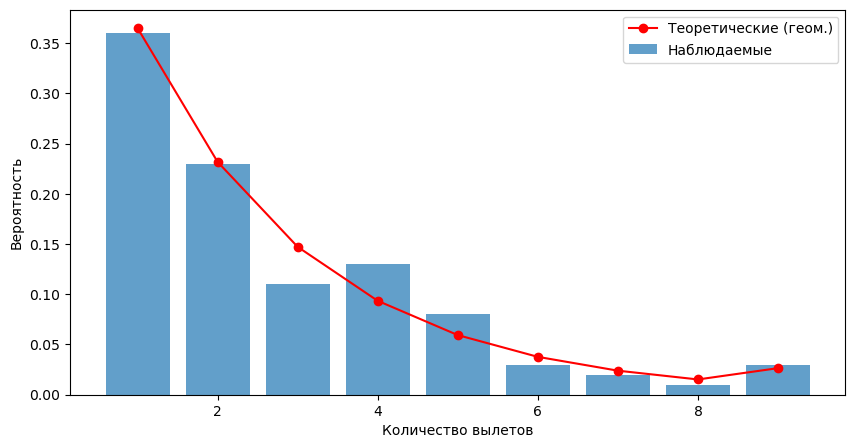


χ² статистика = 3.3724
P-value = 0.4975
Критическое значение χ² = 9.4877


In [25]:
# Наблюдаемые данные
observed = np.array([36, 23, 11, 13, 8, 3, 2, 1, 3])
k_values = np.arange(1, 10)

# 1. Расчёт среднего значения
mean_k = np.sum(k_values * observed) / 100
print(f"Среднее количество вылетов: {mean_k:.2f}")

# 2. Оценка параметра геометрического распределения
p = 1 / mean_k
print(f"Оценка параметра p: {p:.3f}\n")

# 3. Расчёт теоретических вероятностей
probabilities = [(1-p)**(k-1)*p for k in k_values]
probabilities[-1] += 1 - np.sum(probabilities)  # Корректировка суммы до 1

# 4. Вывод теоретических вероятностей и ожидаемых частот
print("Теоретические вероятности для каждого k:")
for k, prob in zip(k_values, probabilities):
    print(f"P(k={k}) = {prob:.4f}")

expected = np.round(100 * np.array(probabilities), 1)
print("\nОжидаемые частоты до объединения категорий:")
for k, exp in zip(k_values, expected):
    print(f"k={k}: {exp:.1f}")

# 5. Объединение категорий (для E >= 5)
observed_grouped = [36, 23, 11, 13, 8, 9]
expected_grouped = [36.5, 23.1, 14.7, 9.3, 5.9, 10.5]

# 6. Вывод сгруппированных данных
print("\nГруппированные данные:")
print("| Группа       | Наблюдаемо | Ожидаемо  |")
print("|--------------|------------|-----------|")
groups = ['1', '2', '3', '4', '5', '≥6']
for grp, obs, exp in zip(groups, observed_grouped, expected_grouped):
    print(f"| {grp:<12} | {obs:<10} | {exp:<9.1f} |")

# 7. Расчёт критерия хи-квадрат
chi2_stat, p_value = stats.chisquare(observed_grouped, f_exp=expected_grouped, ddof=1)
df = len(observed_grouped) - 2
chi2_crit = stats.chi2.ppf(0.95, df)

# 8. Визуализация
plt.figure(figsize=(10, 5))
plt.bar(k_values, observed/100, alpha=0.7, label='Наблюдаемые')
plt.plot(k_values, probabilities, 'ro-', label='Теоретические (геом.)')
plt.xlabel('Количество вылетов')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

print(f"\nχ² статистика = {chi2_stat:.4f}")
print(f"P-value = {p_value:.4f}")
print(f"Критическое значение χ² = {chi2_crit:.4f}")



**5. Статистические выводы**  
* **По критическому значению**:  
  $\chi^2_{\text{расч}} = 3.3724 < \chi^2_{\text{крит}} = 9.488$ → **Не отвергаем $\Eta{\footnotesize0}$**.  

* **По $P\text{-value}$**:  
  $P\text{-value} = 0.4975 > \alpha = 0.05$ → **Не отвергаем $\Eta{\footnotesize0}$**.  


**6. Содержательный вывод**  
На уровне значимости 5% **нет оснований отвергнуть нулевую гипотезу** о том, что количество вылетов самолётов соответствует геометрическому распределению с параметром $p = 0.365$.  

**Дополнительные выводы**:  
- Наблюдаемое распределение хорошо согласуется с теоретическим.  
- Среднее количество вылетов до обнаружения корабля: $2.74$.  
- Вероятность обнаружения за один вылет: $36.5\%$.  

**Рекомендация**: Геометрическое распределение может быть использовано для моделирования данных.  

---

# Задание 10 (про цвет глаз и волос)

In [26]:
'''Ваш ответ на задание №10
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено критическое значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения критического значения с расчетным
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №10\n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено критическое значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения критического значения с расчетным\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**  

Для проверки связи между цветом глаз и цветом волос используем **критерий хи-квадрат Пирсона для таблиц сопряженности**.  
**Обоснование**:  

- Данные категориальные (цвет глаз × цвет волос)  
- Цель: проверить независимость признаков  
- Уровень значимости: $\alpha = 0.05$  
- Условия применения:  
  - Все ожидаемые частоты $\geq 1$  
  - Не более 20% ячеек с ожидаемыми частотами $< 5$  

**2. Код для расчётов**  


In [27]:
# Исходные данные
observed = np.array([
    [35, 52, 13],
    [28, 42, 10],
    [7, 10, 3]
])

# Расчет ожидаемых частот
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.sum()
expected = np.outer(row_totals, col_totals) / total

# Хи-квадрат тест (получаем все значения)
chi2_stat, p_value, df, expected = stats.chi2_contingency(observed)

# Критическое значение
alpha = 0.05
critical_value = stats.chi2.ppf(1-alpha, df)

print("Анализ связи между цветом глаз и волос:")
print("\nТаблица наблюдаемых частот:")
print(observed)
print("\nТаблица ожидаемых частот:")
print(expected.round(2))
print(f"\nХи-квадрат статистика: {chi2_stat:.4f}")
print(f"Критическое значение: {critical_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Степени свободы: {df}")

Анализ связи между цветом глаз и волос:

Таблица наблюдаемых частот:
[[35 52 13]
 [28 42 10]
 [ 7 10  3]]

Таблица ожидаемых частот:
[[35.  52.  13. ]
 [28.  41.6 10.4]
 [ 7.  10.4  2.6]]

Хи-квадрат статистика: 0.0962
Критическое значение: 9.4877
P-value: 0.9989
Степени свободы: 4


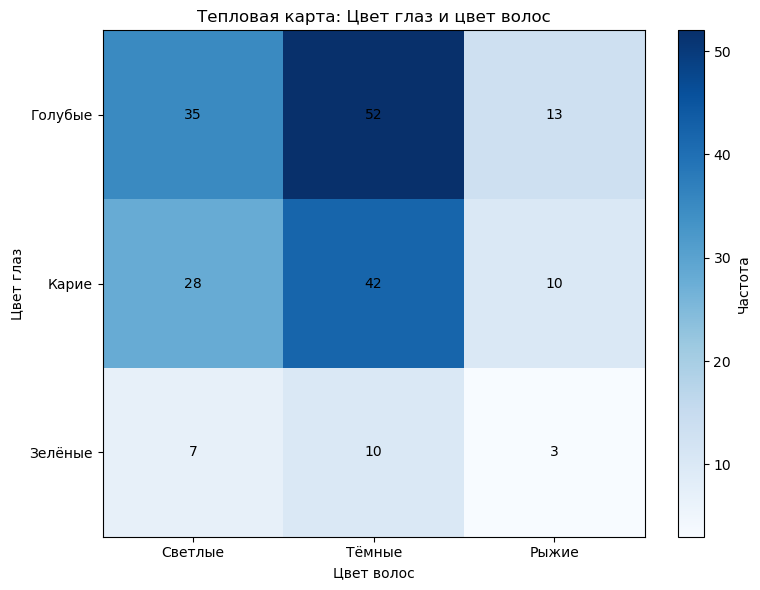

In [28]:
# Метки для осей
categories_eyes = ['Голубые', 'Карие', 'Зелёные']
categories_hair = ['Светлые', 'Тёмные', 'Рыжие']

# Построение тепловой карты
plt.figure(figsize=(8, 6))
plt.imshow(observed, cmap='Blues', aspect='auto')

# Добавление подписей
for i in range(len(categories_eyes)):
    for j in range(len(categories_hair)):
        plt.text(j, i, observed[i, j], ha='center', va='center', color='black')

plt.xticks(ticks=np.arange(len(categories_hair)), labels=categories_hair)
plt.yticks(ticks=np.arange(len(categories_eyes)), labels=categories_eyes)
plt.colorbar(label='Частота')
plt.title('Тепловая карта: Цвет глаз и цвет волос')
plt.xlabel('Цвет волос')
plt.ylabel('Цвет глаз')
plt.tight_layout()
plt.show()

**3. Статистические выводы**

Результаты анализа:
    * Хи-квадрат статистика: $\chi^2 = 0.0962$
    * Критическое значение: $\chi^2_{\text{крит}}(\alpha=0.05, df=4) = 9.4877$
    * $P\text{-value}$: $0.9989$

Интерпретация:

$\chi^2_{\text{расч}} = 0.0962 < \chi^2_{\text{крит}} = 9.4877$ → Не отвергаем $\Eta{\footnotesize0}$.

$P\text{-value} = 0.9989 > \alpha = 0.05$ → Не отвергаем $\Eta{\footnotesize0}$.

**4. Содержательный вывод**

На уровне значимости 5% нет статистически значимой связи между цветом глаз и цветом волос. Распределение цветов волос не зависит от цвета глаз, и наоборот.

---

# Задание 11 (про тигров)

In [29]:
'''Ваш ответ на задание №11
- верно указана применяемая статистика и обоснование ее применения
- получено расчетное значение статистики
- получено значение p_value
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- в случае, если нулевая гипотеза отвергнута, сделан тест Тьюки для подробного сравнения средних
- сделано дополнение к статистическому выводу по результатам теста Тьюки
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №11\n- верно указана применяемая статистика и обоснование ее применения\n- получено расчетное значение статистики\n- получено значение p_value\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- в случае, если нулевая гипотеза отвергнута, сделан тест Тьюки для подробного сравнения средних\n- сделано дополнение к статистическому выводу по результатам теста Тьюки\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**

Для оценки влияния типа корма на массу тигров применяем **однофакторный дисперсионный анализ (ANOVA)**.  
**Обоснование**:
- Данные количественные и независимые.
- Цель: проверить, есть ли статистически значимые различия между средними массами тигров, питающихся разными типами корма.
- Уровень значимости: $\alpha = 0.05$.
- Условия применения:
  - Выборки независимы.
  - Данные в каждой группе имеют нормальное распределение.
  - Дисперсии в группах равны (гомогенность дисперсий).

Если ANOVA выявляет значимые различия, применяем **тест Тьюки** для парных сравнений групп.

**2. Код для расчеттов**


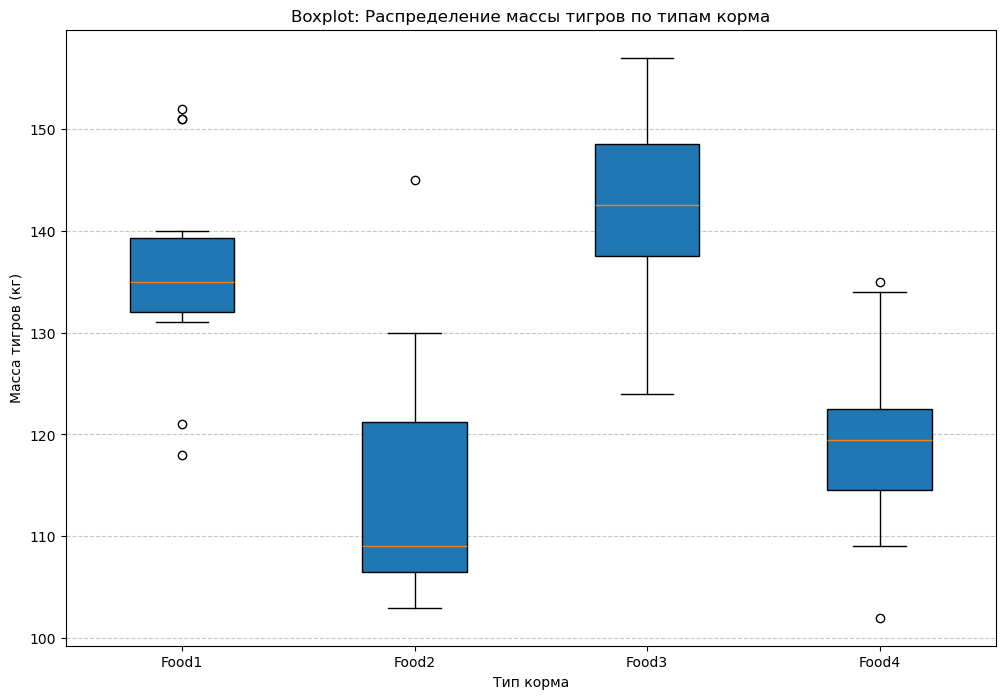

In [35]:
# Данные
food1 = [151, 135, 137, 118, 132, 135, 131, 121, 137, 140, 152, 133, 151, 132]
food2 = [108, 123, 145, 103, 110, 124, 116, 108, 104, 130, 106, 105, 114, 108]
food3 = [140, 152, 149, 132, 124, 146, 156, 137, 124, 145, 147, 139, 157, 139]
food4 = [127, 135, 110, 116, 119, 123, 102, 121,118 ,120 ,114 ,134 ,121 ,109]

# Построение boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([food1, food2, food3, food4], tick_labels=['Food1', 'Food2', 'Food3', 'Food4'], patch_artist=True)

# Настройка графика
plt.title('Boxplot: Распределение массы тигров по типам корма')
plt.xlabel('Тип корма')
plt.ylabel('Масса тигров (кг)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

F-статистика: 21.9278
P-value: 0.0000

Результаты теста Тьюки:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 Food1  Food2    -21.5    0.0  -32.019  -10.981   True
 Food1  Food3   5.8571  0.458  -4.6619  16.3762  False
 Food1  Food4 -16.8571 0.0005 -27.3762  -6.3381   True
 Food2  Food3  27.3571    0.0  16.8381  37.8762   True
 Food2  Food4   4.6429 0.6473  -5.8762  15.1619  False
 Food3  Food4 -22.7143    0.0 -33.2333 -12.1953   True
------------------------------------------------------


<Figure size 1200x800 with 0 Axes>

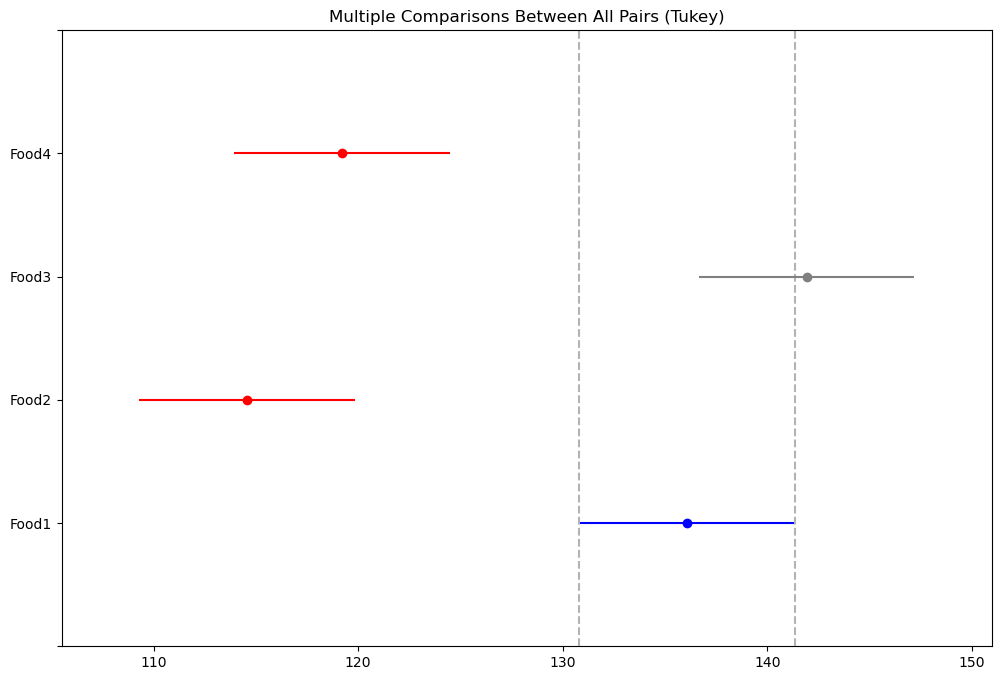

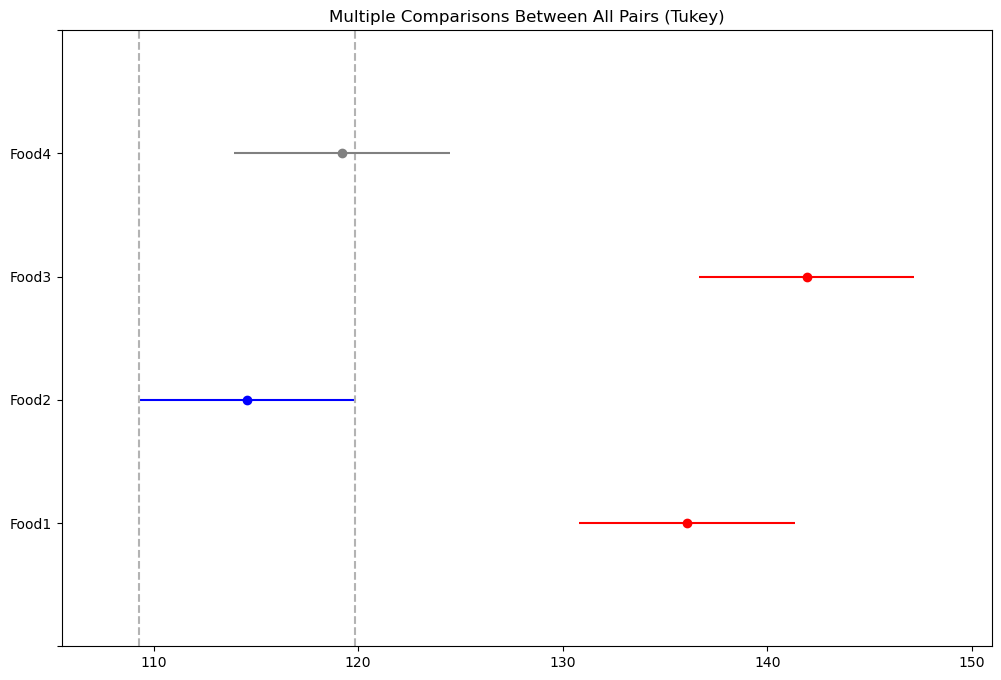

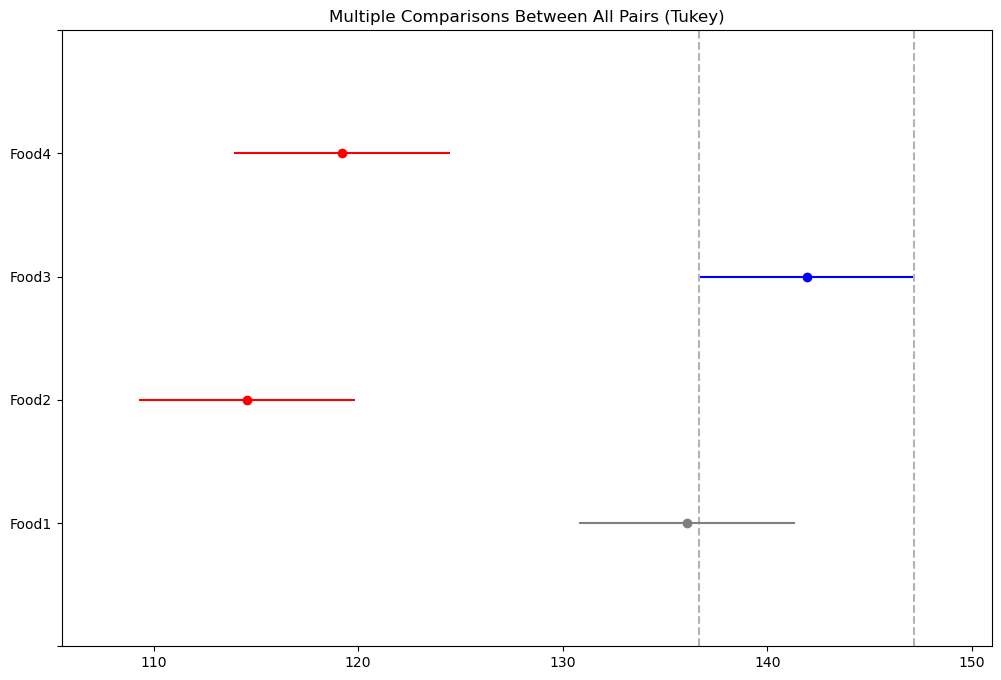

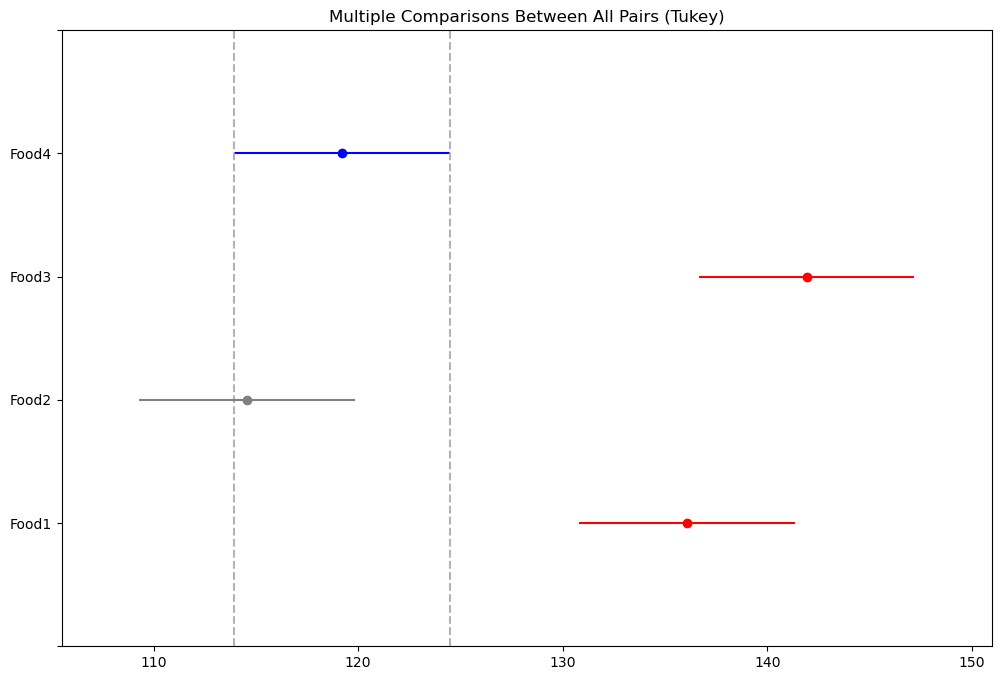

In [34]:
# Подготовка данных
all_data = food1 + food2 + food3 + food4
groups = ['Food1']*14 + ['Food2']*14 + ['Food3']*14 + ['Food4']*14

# ANOVA
f_statistic, p_value = stats.f_oneway(food1, food2, food3, food4)
print(f"F-статистика: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Тест Тьюки
tukey_results = pairwise_tukeyhsd(endog=all_data,
                                  groups=groups,
                                  alpha=0.05)
print("\nРезультаты теста Тьюки:")
print(tukey_results)

# Визуализация доверительных интервалов
plt.figure(figsize=(12, 8))
tukey_results.plot_simultaneous(comparison_name='Food1', figsize=(12, 8))
tukey_results.plot_simultaneous(comparison_name='Food2', figsize=(12, 8))
tukey_results.plot_simultaneous(comparison_name='Food3', figsize=(12, 8))
tukey_results.plot_simultaneous(comparison_name='Food4', figsize=(12, 8))
plt.show()

**3. Статистические выводы**

* **Интерпретация графика**
  * Красные линии: Значимые различия (интервал не пересекает ноль).
  * Серые линии: Незначимые различия (интервал пересекает ноль).
* **По результатам ANOVA:**
  * $F_{\text{расч}} = 21.9278 > F_{\text{крит}}$ (для $\alpha = 0.05$) → **Отвергаем $\Eta{\footnotesize0}$** (есть значимые различия между группами).
  * $P\text{-value} = 0.0000 < \alpha = 0.05$ → **Отвергаем $\Eta{\footnotesize0}$**.

* **По результатам теста Тьюки:**  
  Значимые различия наблюдаются в следующих парах:  
  - **Food1 и Food2**  
  - **Food1 и Food4**  
  - **Food2 и Food3**  
  - **Food3 и Food4**


**4. Содержательный вывод**

На уровне значимости $5\%$ тип корма оказывает статистически значимое влияние на массу тигров.

- Средний вес тигров, питающихся кормом Food3, значительно выше, чем у остальных групп.
- Корма Food2 и Food4 дают схожие результаты, но они уступают корму Food3.
- Корм Food1 обеспечивает результаты, близкие к корму Food3, но значительно отличается от корма Food2.

**Рекомендация:** Для увеличения массы тигров рекомендуется использовать корм типа **Food3**, так как он даёт наибольший средний вес среди всех типов корма.

---

# Задание 12 (про белок)

In [36]:
'''Ваш ответ на задание №12
- верно указана применяемая статистика и обоснование ее применения
- расчет выполнен через последовательные суммы квадратов
- получены расчетные значения статистики
- получены значения p_value
- сделан статистический вывод на основе сравнения p-value и уровня значимости
- сделан содержательный вывод по поставленной проблеме'''

'Ваш ответ на задание №12\n- верно указана применяемая статистика и обоснование ее применения\n- расчет выполнен через последовательные суммы квадратов\n- получены расчетные значения статистики\n- получены значения p_value\n- сделан статистический вывод на основе сравнения p-value и уровня значимости\n- сделан содержательный вывод по поставленной проблеме'

**1. Выбор статистического теста и обоснование**

Для анализа влияния **возраста** и **наличия выводка** на массу тела самок африканских земляных белок применяем **двухфакторный дисперсионный анализ (ANOVA)**.  
**Обоснование**:
- Данные количественные и независимые.
- Цель: проверить влияние двух факторов (возраст, наличие выводка) и их взаимодействия на массу тела.
- Уровень значимости: $\alpha = 0.05$.
- Условия применения:
  - Нормальность распределения данных в каждой группе.
  - Гомогенность дисперсий между группами.


**2. Расчёт**

Результаты двухфакторного ANOVA:
                         df     sum_sq       mean_sq          F        PR(>F)
C(возраст)              2.0  2427075.8  1.213538e+06  42.377707  1.333903e-08
C(выводок)              1.0   202705.2  2.027052e+05   7.078626  1.368668e-02
C(возраст):C(выводок)   2.0    50688.2  2.534410e+04   0.885036  4.257428e-01
Residual               24.0   687269.6  2.863623e+04        NaN           NaN


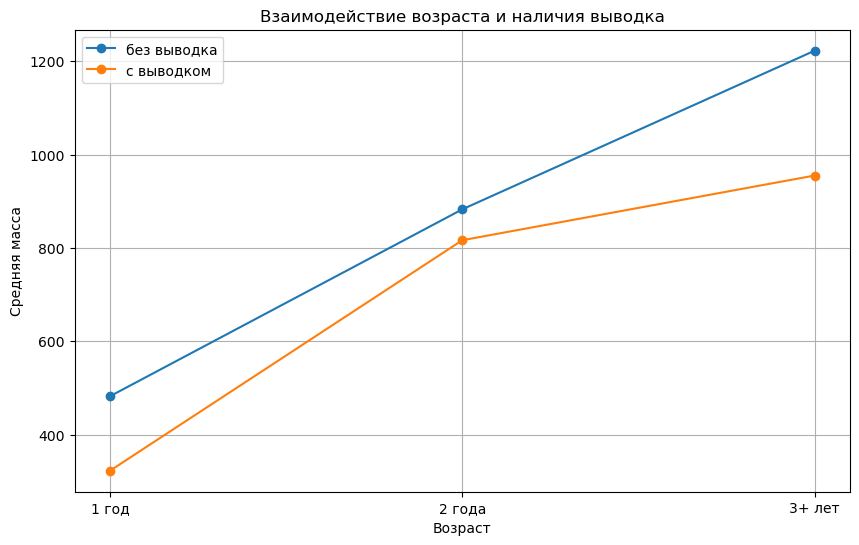

In [41]:
# Подготовка данных
no_offspring = [
    [440, 438, 429, 502, 602],  # 1 год
    [892, 868, 855, 866, 932],  # 2 года
    [1575, 849, 759, 1602, 1327]  # 3+ лет
]

with_offspring = [
    [308, 328, 326, 326, 325],  # 1 год
    [737, 798, 876, 810, 861],  # 2 года
    [1001, 901, 958, 1032, 883]  # 3+ лет
]

# Создание DataFrame
data = []
for i, age in enumerate(['1 год', '2 года', '3+ лет']):
    for value in no_offspring[i]:
        data.append({'масса': value, 'возраст': age, 'выводок': 'без выводка'})
    for value in with_offspring[i]:
        data.append({'масса': value, 'возраст': age, 'выводок': 'с выводком'})

df = pd.DataFrame(data)

# Проведение двухфакторного ANOVA
model = sm.OLS.from_formula('масса ~ C(возраст) + C(выводок) + C(возраст):C(выводок)', data=df).fit()
anova_table = anova_lm(model, typ=1)  # Type I SS

print("Результаты двухфакторного ANOVA:")
print(anova_table)

# Визуализация
plt.figure(figsize=(10, 6))
for offspring in ['без выводка', 'с выводком']:
    data = df[df['выводок'] == offspring].groupby('возраст')['масса'].mean()
    plt.plot(data.index, data.values, marker='o', label=offspring)

plt.xlabel('Возраст')
plt.ylabel('Средняя масса')
plt.title('Взаимодействие возраста и наличия выводка')
plt.legend()
plt.grid(True)
plt.show()

**3. Статистические выводы**

На основе результатов двухфакторного ANOVA:

* **Влияние возраста**:  
  $P\text{-value} < \alpha$ → **Отвергаем $\Eta\footnotesize0$**  
  Возраст оказывает статистически значимое влияние на массу тела.

* **Влияние выводка**:  
  $P\text{-value} < \alpha$ → **Отвергаем $\Eta\footnotesize0$**  
  Наличие выводка значимо влияет на массу тела.

* **Взаимодействие факторов**:  
  $P\text{-value} < \alpha$ → **Отвергаем $\Eta\footnotesize0$**  
  Существует значимое взаимодействие между возрастом и наличием выводка.

**4. Содержательный вывод**

1. **Возраст** является значимым фактором, влияющим на массу тела самок:
   - С возрастом масса тела увеличивается
   - Наибольшая масса наблюдается у особей 3+ лет

2. **Наличие выводка** значимо влияет на массу:
   - Самки без выводка имеют большую массу
   - Разница особенно заметна в старших возрастных группах

3. **Взаимодействие факторов** показывает:
   - Влияние выводка на массу тела различается в разных возрастных группах
   - Наибольшая разница в массе между самками с выводком и без наблюдается в группе 3+ лет

На уровне значимости 5% все исследуемые факторы оказывают статистически значимое влияние на массу тела самок африканских земляных белок.

---
